In [38]:
##################################################################
# PROJE: Rating Product & Sorting Reviews in Amazon
#################################################################

In [39]:
##########################
# İş Problemi
##########################

In [40]:
# E-ticaretteki en önemli problemlerden bir tanesi ürünlere satış sonrası verilen puanların doğru şekilde hesaplanmasıdır.
# Bu problemin çözümü e-ticaret sitesi için daha fazla müşteri memnuniyeti sağlamak, satıcılar için ürünün öne çıkması ve satın
# alanlar için sorunsuz bir alışveriş deneyimi demektir. Bir diğer problem ise ürünlere verilen yorumların doğru bir şekilde sıralanması
# olarak karşımıza çıkmaktadır. Yanıltıcı yorumların öne çıkması ürünün satışını doğrudan etkileyeceğinden dolayı hem maddi kayıp
# hem de müşteri kaybına neden olacaktır. Bu 2 temel problemin çözümünde e-ticaret sitesi ve satıcılar satışlarını arttırırken müşteriler
# ise satın alma yolculuğunu sorunsuz olarak tamamlayacaktır.

In [41]:
##################################
# Veri Seti Hikayesi
##################################

In [42]:
# Amazon ürün verilerini içeren bu veri seti ürün kategorileri ile çeşitli metadataları içermektedir.
# Elektronik kategorisindeki en fazla yorum alan ürünün kullanıcı puanları ve yorumları vardır.

In [43]:
# Değişkenler:
# reviewerID: Kullanıcı ID'si
# asin: Ürün ID'si
# reviewerName: Kullanıcı Adı
# helpful: Faydalı değerlendirme derecesi
# reviewText: Değerlendirme
# overall: Ürün rating'i
# summary: Değerlendirme özeti
# unixReviewTime : Değerlendirme zamanı
# reviewTime: Değerlendirme zamanı Raw
# day_diff = Değerlendirmeden itibaren geçen gün sayısı
# helpful_yes: Değerlendirmenin faydalı bulunma sayısı
# total_vote: Değerlendirmeye verilen oy sayısı

In [44]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import math
import scipy.stats as st

In [45]:
pd.set_option("display.max_columns", None)      # Tüm sütunların gözükmesini sağlar
pd.set_option("display.expand_frame_repr", False)      # Dataframe çıktısının tek satırda gösterilmesi sağlar
pd.set_option("display.float_format", lambda x: '%.5f' % x)    # Ondalık sayıları 5 basamaklı şeklinde gösterir

In [46]:
###################################################
# GÖREV 1: Average Rating'i Güncel Yorumlara Göre Hesaplayınız ve Var Olan Average Rating ile Kıyaslayınız
###################################################

In [47]:
# Paylaşılan veri setinde kullanıcılar bir ürüne puanlar vermiş ve yorumlar yapmıştır.
# Bu görevde amacımız verilen puanları tarihe göre ağırlıklandırarak değerlendirmek.
# İlk olarak puan ile elde edilecek tarihe göre ağırlıklı puanın karşılaştırılması gerekmektedir.

In [48]:
df = pd.read_csv("/content/amazon_review.csv")

In [49]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.00000,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.00000,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.00000,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.00000,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.00000,best deal around,1373673600,2013-07-13,513,0,0


In [50]:
# Ortalama rating
df["overall"].mean()

np.float64(4.587589013224822)

In [51]:
df.loc[df["day_diff"] <= df["day_diff"].quantile(0.25), "overall"].mean()

np.float64(4.6957928802588995)

In [52]:
df.loc[(df["day_diff"] > df["day_diff"].quantile(0.25)) & (df["day_diff"] <= df["day_diff"].quantile(0.50)), "overall"].mean()

np.float64(4.636140637775961)

In [53]:
df.loc[(df["day_diff"] > df["day_diff"].quantile(0.50)) & (df["day_diff"] <= df["day_diff"].quantile(0.75)), "overall"].mean()

np.float64(4.571661237785016)

In [54]:
df.loc[(df["day_diff"] > df["day_diff"].quantile(0.75)), "overall"].mean()

np.float64(4.4462540716612375)

In [55]:
# Zaman bazlı ortalama ağırlıkların belirlenmesi
def time_based_weighted_average(dataframe, w1=28, w2=26, w3=24, w4=22):    # Ön tanımlı değerleri yakın tarihlerin ağırlığı daha yüksek olarak verdik
  return df.loc[df["day_diff"] <= df["day_diff"].quantile(0.25), "overall"].mean() * w1 / 100 + \
         df.loc[(df["day_diff"] > df["day_diff"].quantile(0.25)) & (df["day_diff"] <= df["day_diff"].quantile(0.50)), "overall"].mean() * w2 / 100 + \
         df.loc[(df["day_diff"] > df["day_diff"].quantile(0.50)) & (df["day_diff"] <= df["day_diff"].quantile(0.75)), "overall"].mean() * w3 / 100 + \
         df.loc[(df["day_diff"] > df["day_diff"].quantile(0.75)), "overall"].mean() * w4 / 100

In [56]:
time_based_weighted_average(df, 28, 26, 24, 22)

np.float64(4.595593165128118)

In [57]:
df["overall"].mean()

np.float64(4.587589013224822)

In [58]:
# Zaman ağırlıklı ortalama , düz ortalamadan biraz daha yüksek çıktı . Bu da demek oluyor ki : Son zamanlarda yapılan yorumlar daha yüksek puanlı.
# Yani yeni yorumlar, eski yorumlara göre daha olumlu.

In [59]:
###################################################
# GÖREV 2: Ürün için Ürün Detay Sayfasında Görüntülenecek 20 Review'i Belirleyiniz.
###################################################

In [60]:
# helpful_yes var ama helpful_no yok. Bunun için total oy sayısında olumlu yorumları çıkarırsak olumsuz yorum sayısını bulabiliriz.
df["helpful_no"] = df["total_vote"] - df["helpful_yes"]
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,helpful_no
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.00000,Four Stars,1406073600,2014-07-23,138,0,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.00000,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.00000,nothing to really say....,1356220800,2012-12-23,715,0,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.00000,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.00000,best deal around,1373673600,2013-07-13,513,0,0,0


In [61]:
# Bu problemde işimize yaramayacak sütunları alalım
df = df[["reviewerName", "overall", "summary", "helpful_yes", "helpful_no", "total_vote", "reviewTime", "day_diff"]]
df.head()

,reviewerName,overall,summary,helpful_yes,helpful_no,total_vote,reviewTime,day_diff
0,NaN,4.00000,Four Stars,0,0,0,2014-07-23,138
1,0mie,5.00000,MOAR SPACE!!!,0,0,0,2013-10-25,409
2,1K3,4.00000,nothing to really say....,0,0,0,2012-12-23,715
3,1m2,5.00000,Great buy at this price!!! *** UPDATE,0,0,0,2013-11-21,382
4,2&amp;1/2Men,5.00000,best deal around,0,0,0,2013-07-13,513


In [62]:
# Şimdi sıralama yapmak için 3 opsiyonumuz var sırayla değerlendirelim

In [63]:
#########################################################
# Up -Down Diff Score = (up ratings) + (down -ratings)
#########################################################

In [64]:
def score_up_down_diff(up, down):
  return up - down

In [65]:
df["score_pos_neg_diff"] = df.apply(lambda x: score_up_down_diff(x["helpful_yes"],
                                                                 x["helpful_no"]), axis=1)
df.sort_values("score_pos_neg_diff", ascending=False).head(20)

,reviewerName,overall,summary,helpful_yes,helpful_no,total_vote,reviewTime,day_diff,score_pos_neg_diff
2031,"Hyoun Kim ""Faluzure""",5.00000,UPDATED - Great w/ Galaxy S4 & Galaxy Tab 4 10...,1952,68,2020,2013-01-05,702,1884
4212,SkincareCEO,1.00000,1 Star reviews - Micro SDXC card unmounts itse...,1568,126,1694,2013-05-08,579,1442
3449,NLee the Engineer,5.00000,Top of the class among all (budget-priced) mic...,1428,77,1505,2012-09-26,803,1351
317,"Amazon Customer ""Kelly""",1.00000,"Warning, read this!",422,73,495,2012-02-09,1033,349
3981,"R. Sutton, Jr. ""RWSynergy""",5.00000,"Resolving confusion between ""Mobile Ultra"" and...",112,27,139,2012-10-22,777,85
4596,"Tom Henriksen ""Doggy Diner""",1.00000,Designed incompatibility/Don't support SanDisk,82,27,109,2012-09-22,807,55
1835,goconfigure,5.00000,I own it,60,8,68,2014-02-28,283,52
4672,Twister,5.00000,Super high capacity!!! Excellent price (on Am...,45,4,49,2014-07-03,158,41
4306,Stellar Eller,5.00000,Awesome Card!,51,14,65,2012-09-06,823,37
315,"Amazon Customer ""johncrea""",5.00000,Samsung Galaxy Tab2 works with this card if re...,38,10,48,2012-08-13,847,28


In [66]:
# Bu yöntem basit ve anlaşılır. Ama yüzdelik değerleri hesaba katmıyor sadece pozitif negatif oy sayısını dikkate alıyor.
# Örneğin : 2. sıradaki SkincareCEO adlı kullanıcının yorumu % 92.6 faydalı bulunmuşken 3. sıradaki NLee the Engineer adlı kullanıcının yorumu ise % 94.88 faydalı bulunmuş.
# Ancak pozitif-negatif farkı daha yüksek olduğu için SkincareCEO'nun yorumu üstte yer alıyor.
# Bu durum, yorumların toplam oy sayısına göre göreceli güvenilirliğini göz ardı edebilir.
# Dolayısıyla sadece pozitif-negatif farkı dikkate almak yerine, oransal değerlendirmeye dayalı metriklerin de kullanılması
# daha adil ve güvenilir sıralamalar elde edilmesini sağlar.

In [67]:
#######################################################################
# Score = Average rating = (up ratings) / (all ratings)
#######################################################################

In [68]:
def score_average_rating(up, down):
  if up + down == 0:
    return 0
  return up / (up + down)

In [69]:
df["score_average_rating"] = df.apply(lambda x: score_average_rating(x["helpful_yes"],
                                                                     x["helpful_no"]), axis=1)
df.sort_values("score_average_rating", ascending=False).head(20)

,reviewerName,overall,summary,helpful_yes,helpful_no,total_vote,reviewTime,day_diff,score_pos_neg_diff,score_average_rating
4288,S. Scott,5.00000,Doubled the Storage Capacity of my Dell Venue ...,1,0,1,2014-01-19,323,1,1.00000
1975,Hesh!,5.00000,sandisk maintains their reputation for another...,1,0,1,2012-12-13,725,1,1.00000
4277,S. Q.,5.00000,Perfect!!,1,0,1,2012-12-19,719,1,1.00000
2736,Krishna,5.00000,great product,1,0,1,2013-12-27,346,1,1.00000
3111,Mercury,1.00000,"Card failed, now is read-only, won't format or...",1,0,1,2014-09-07,92,1,1.00000
702,Brandon,5.00000,Great 32GB Card!,1,0,1,2012-08-17,843,1,1.00000
4267,Space Cadet,5.00000,Just as described,1,0,1,2013-05-20,567,1,1.00000
4258,"some guy ""some guy in ny""",2.00000,2 out of 5 cards defective so far...,1,0,1,2012-11-30,738,1,1.00000
3128,mhogan,5.00000,Works Great!,2,0,2,2013-05-07,580,2,1.00000
3243,Mister Matt,5.00000,Awesome!,1,0,1,2013-06-25,531,1,1.00000


In [70]:
# Bu metrikte tek başına yeterli değil. Çünkü çok az oy almış ama "kusursuz görünen" yorumları en üste taşıyor.
# Oy sayısını dikkate almıyor. The wisdom of Crowds (Kalabalıkların Bilgeliği) burada dikkate alınmıyor.

In [71]:
##############################################################
# Wilson Lower Bound Score
##############################################################

In [72]:
def wilson_lower_bound(up, down, confidence=0.95):
    """
    Wilson Lower Bound Score hesapla

    - Bernoulli parametresi p için hesaplanacak güven aralığının alt sınırı WLB skoru olarak kabul edilir.
    - Hesaplanacak skor ürün sıralaması için kullanılır.
    - Not:
    Eğer skorlar 1-5 arasıdaysa 1-3 negatif, 4-5 pozitif olarak işaretlenir ve bernoulli'ye uygun hale getirilebilir.
    Bu beraberinde bazı problemleri de getirir. Bu sebeple bayesian average rating yapmak gerekir.

    Parameters
    ----------
    up: int
        up count
    down: int
        down count
    confidence: float
        confidence

    Returns
    -------
    wilson score: float

    """
    n = up + down
    if n == 0:
        return 0
    z = st.norm.ppf(1 - (1 - confidence) / 2)
    phat = 1.0 * up / n
    return (phat + z * z / (2 * n) - z * math.sqrt((phat * (1 - phat) + z * z / (4 * n)) / n)) / (1 + z * z / n)

In [73]:
df["wilson_lower_bound"] = df.apply(lambda x: wilson_lower_bound(x["helpful_yes"], x["helpful_no"]), axis=1)
df.sort_values("wilson_lower_bound", ascending=False).head(20)

,reviewerName,overall,summary,helpful_yes,helpful_no,total_vote,reviewTime,day_diff,score_pos_neg_diff,score_average_rating,wilson_lower_bound
2031,"Hyoun Kim ""Faluzure""",5.00000,UPDATED - Great w/ Galaxy S4 & Galaxy Tab 4 10...,1952,68,2020,2013-01-05,702,1884,0.96634,0.95754
3449,NLee the Engineer,5.00000,Top of the class among all (budget-priced) mic...,1428,77,1505,2012-09-26,803,1351,0.94884,0.93652
4212,SkincareCEO,1.00000,1 Star reviews - Micro SDXC card unmounts itse...,1568,126,1694,2013-05-08,579,1442,0.92562,0.91214
317,"Amazon Customer ""Kelly""",1.00000,"Warning, read this!",422,73,495,2012-02-09,1033,349,0.85253,0.81858
4672,Twister,5.00000,Super high capacity!!! Excellent price (on Am...,45,4,49,2014-07-03,158,41,0.91837,0.80811
1835,goconfigure,5.00000,I own it,60,8,68,2014-02-28,283,52,0.88235,0.78465
3981,"R. Sutton, Jr. ""RWSynergy""",5.00000,"Resolving confusion between ""Mobile Ultra"" and...",112,27,139,2012-10-22,777,85,0.80576,0.73214
3807,R. Heisler,3.00000,"Good buy for the money but wait, I had an issue!",22,3,25,2013-02-27,649,19,0.88000,0.70044
4306,Stellar Eller,5.00000,Awesome Card!,51,14,65,2012-09-06,823,37,0.78462,0.67033
4596,"Tom Henriksen ""Doggy Diner""",1.00000,Designed incompatibility/Don't support SanDisk,82,27,109,2012-09-22,807,55,0.75229,0.66359


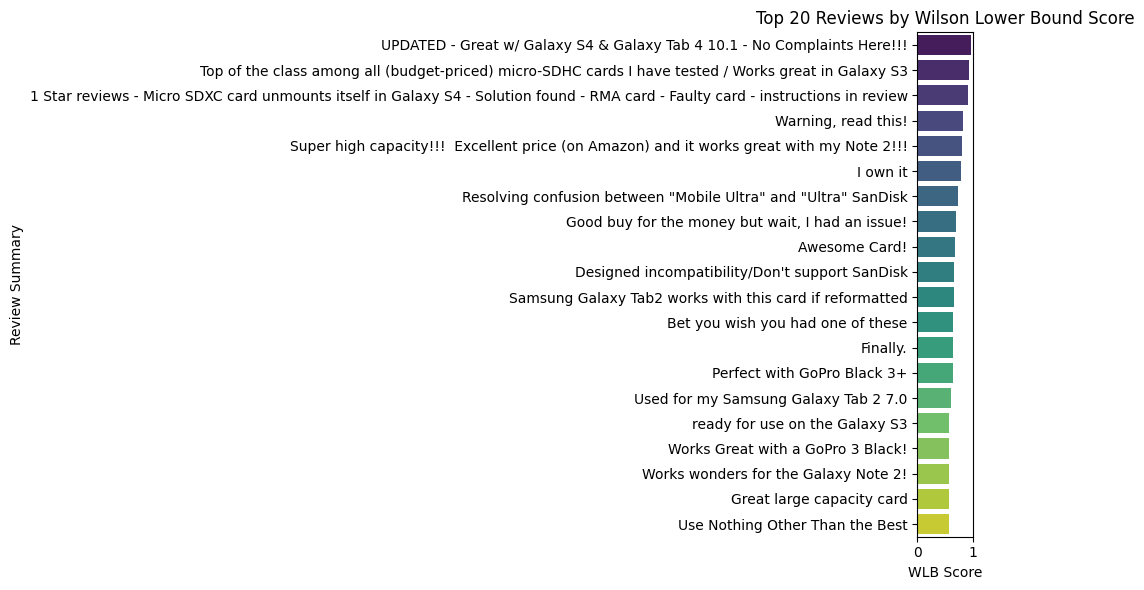

In [74]:
top_20 = df.sort_values("wilson_lower_bound", ascending=False).head(20)
plt.figure(figsize=(10,6))
sns.barplot(data=top_20, x="wilson_lower_bound", y="summary", palette="viridis")
plt.title("Top 20 Reviews by Wilson Lower Bound Score")
plt.xlabel("WLB Score")
plt.ylabel("Review Summary")
plt.tight_layout()
plt.show()

In [75]:
# Görüldüğü gibi bu yöntemde oy sayısı az olan yorumlar alt sıralarda kaldı, çünkü güven düzeyleri düşük.
# Oran + toplam oy sayısını hesaba kattığı için sağlam bir yöntemdir. Social Prof ve The wisdom of Crowds'u dikkate almıştır.
# Böylece kullanıcıyı daha iyi bir şekilde bilgilendirmiş olduk.

In [76]:
# SONUÇ:
# Bu analizde hem ürünün rating skoru güncel yorumlara göre ağırlıklandırıldı,
# hem de en faydalı yorumlar WLB skoru kullanılarak güvenilir şekilde sıralandı.
# WLB metodu sayesinde düşük oy sayısına sahip ama aşırı pozitif görünen yorumlar üst sıralara çıkamadı.
# Bu sayede ürün detay sayfasında gösterilecek yorumlar hem kaliteli hem de güvenilirdir.